In [136]:
# Name: Tao Lin
# ID: 62800691
# CERTIFICATION: I understand FIU’s academic policies, and I certify that this work is my 
#                own and that none of it is the work of any other person.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the COP4612_HW1.csv data into a dataframe and show the first 10 entries of the data frame.
df = pd.read_csv('./COP4612_HW1.csv')
df.head(10)

,salary,sex,pay_grade,position,age,year_at_company
0,51945.03,M,GS10,FinancialAnalyst,49,19
1,120282.27,M,GS15,Accountant,20,0
2,73131.81,F,GS11,FinancialAnalyst,40,16
3,69548.85,M,GS11,Developer,32,4
4,114453.95,M,GS13,Accountant,57,21
5,100371.59,F,GS10,Secretary,64,40
6,108991.56,M,GS13,Developer,35,10
7,83882.52,M,GS11,Developer,37,12
8,76271.75,M,GS11,Developer,33,5
9,152449.05,M,GS15,Accountant,56,14


In [3]:
# 2. Print out the features (columns) name of the dataframe.
print(df.columns)

Index(['salary', 'sex', 'pay_grade', 'position', 'age', 'year_at_company'], dtype='object')


In [4]:
# 3. Print out the features (columns) dtype information.
print("--------------------------------")
print("Feature Info")
print("--------------------------------")
print(df.info())

--------------------------------
Feature Info
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   salary           3000 non-null   float64
 1   sex              3000 non-null   object 
 2   pay_grade        3000 non-null   object 
 3   position         3000 non-null   object 
 4   age              3000 non-null   int64  
 5   year_at_company  3000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 140.8+ KB
None


In [5]:
# 4. Print out the correlation of the features of the dataframe:
print(df.corr())

                   salary       age  year_at_company
salary           1.000000  0.052545         0.390425
age              0.052545  1.000000         0.665181
year_at_company  0.390425  0.665181         1.000000


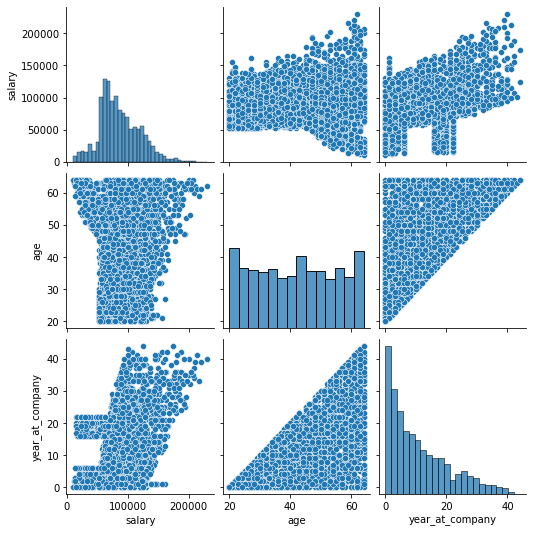

In [6]:
# 5. Show a pairwise plot of the feature of the dataframe. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

In [7]:
# 6. Create dummy variables for features: sex, position, paygrade, then print out the column names of the 
# dataframe and show the first five entries of the dataframe.

# filtering out data from original data frame, filter out only sex, position, and paygrade
df2 = df.loc[((df.sex == 'F') | (df.sex == 'M')) & ((df.position == 'Accountant') | (df.position == 'Developer') 
             | (df.position == 'Engineer') | (df.position == 'FinancialAnalyst') | (df.position == 'Secretary')) 
             & ((df.pay_grade == 'GS10') | (df.pay_grade == 'GS11') | (df.pay_grade == 'GS12') | (df.pay_grade == 'GS13') 
             | (df.pay_grade == 'GS14') | (df.pay_grade == 'GS15'))]
df2 = pd.get_dummies(df2, columns = ['sex', 'position', 'pay_grade'], drop_first = False)
print(df2.columns) # print out the column names of the dataframe

Index(['salary', 'age', 'year_at_company', 'sex_F', 'sex_M',
       'position_Accountant', 'position_Developer', 'position_Engineer',
       'position_FinancialAnalyst', 'position_Secretary', 'pay_grade_GS10',
       'pay_grade_GS11', 'pay_grade_GS12', 'pay_grade_GS13', 'pay_grade_GS14',
       'pay_grade_GS15'],
      dtype='object')


In [8]:
df2.head(5) # print out the first five entries of the dataframe

,salary,age,year_at_company,sex_F,sex_M,position_Accountant,position_Developer,position_Engineer,position_FinancialAnalyst,position_Secretary,pay_grade_GS10,pay_grade_GS11,pay_grade_GS12,pay_grade_GS13,pay_grade_GS14,pay_grade_GS15
0,51945.03,49,19,0,1,0,0,0,1,0,1,0,0,0,0,0
1,120282.27,20,0,0,1,1,0,0,0,0,0,0,0,0,0,1
2,73131.81,40,16,1,0,0,0,0,1,0,0,1,0,0,0,0
3,69548.85,32,4,0,1,0,1,0,0,0,0,1,0,0,0,0
4,114453.95,57,21,0,1,1,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='age', ylabel='salary'>

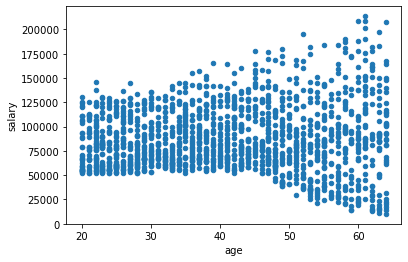

In [9]:
# 7. Plot the only women data with x-axis -> age and y-axis -> salary.
import matplotlib.pyplot as plt
%matplotlib inline
df_women = df2.loc[(df2.sex_F == 1)] # filter out only women data frame
df_women.plot(x = 'age', y = 'salary', kind = 'scatter')

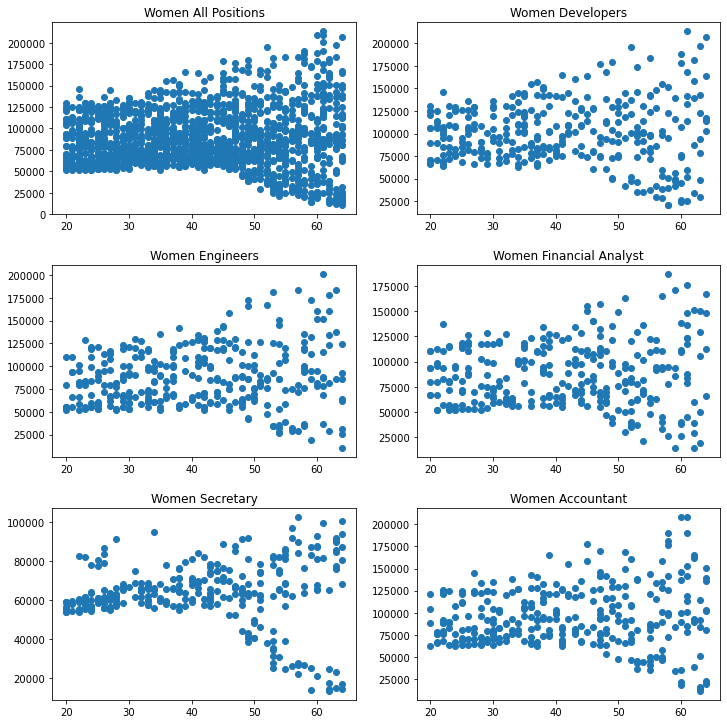

In [10]:
# 8. Subplot the only women data by position with x-axis -> age and y-axis -> salary. 

#define subplots (display subplot of scatter)
df_women_Developers = df_women[df_women['position_Developer'] == 1]
df_women_Engineers = df_women[df_women['position_Engineer'] == 1]
df_women_Financial_Analyst = df_women[df_women['position_FinancialAnalyst'] == 1]
df_women_Secretary = df_women[df_women['position_Secretary'] == 1]
df_women_Accountant = df_women[df_women['position_Accountant'] == 1]

fig, ax = plt.subplots(3, 2, figsize=(10,10))
fig.tight_layout(h_pad=3, w_pad=3)

ax[0,0].scatter(df_women['age'],df_women['salary'])
ax[0,1].scatter(df_women_Developers['age'], df_women_Developers['salary'])
ax[1,0].scatter(df_women_Engineers['age'], df_women_Engineers['salary'])
ax[1,1].scatter(df_women_Financial_Analyst['age'], df_women_Financial_Analyst['salary'])
ax[2,0].scatter(df_women_Secretary['age'], df_women_Secretary['salary'])
ax[2,1].scatter(df_women_Accountant['age'], df_women_Accountant['salary'])

ax[0,0].set_title("Women All Positions")
ax[0,1].set_title("Women Developers")
ax[1,0].set_title("Women Engineers")
ax[1,1].set_title("Women Financial Analyst")
ax[2,0].set_title("Women Secretary")
ax[2,1].set_title("Women Accountant")

plt.show()

# Write a 1-3 sentence comment about what you see in these graphs.
# 1) For women in all positions, women's salary tends to increase at the age from 40 to 60
# 2) For women in all positions, the average salaries of most women is between $50K and $125K.
# 3) For women in all positions, some women with salary below 50k are mainly concentrated in the age group of 50 to 60 or above.
# 4) For women in all positions, women with the highest or lowest salary is concentrated around the age of 60. 
# 5) Compared with other positions, the average salary of women secretary is around $60K.

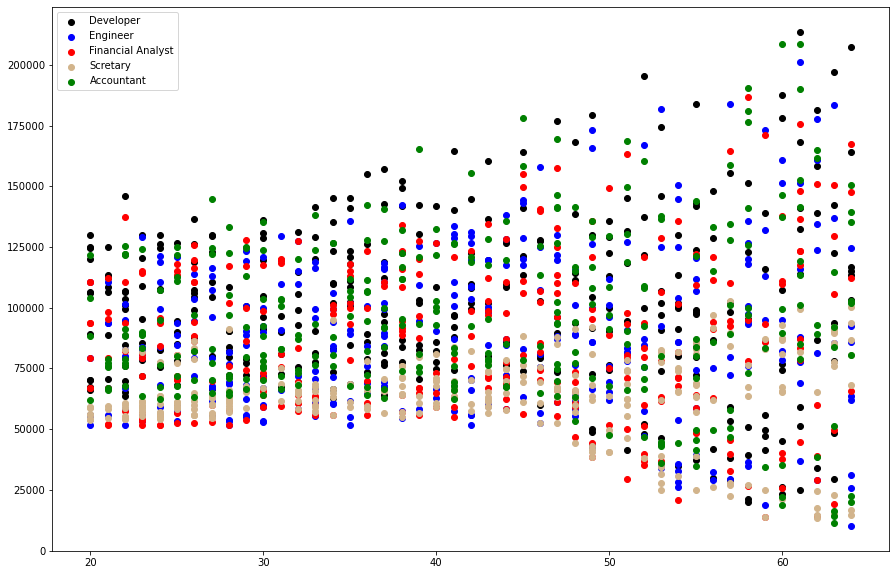

In [19]:
# 9. Plot the only women data by position with x-axis -> age and y-axis -> salary. Color code each position data.

import matplotlib.pyplot as plt
figure = plt.figure(figsize = (15,10))
#fig, ax = plt.subplots(1, 1, figsize =(15,10))
plt.scatter(df_women_Developers['age'], df_women_Developers['salary'], color= 'black', label = 'Developer')
plt.scatter(df_women_Engineers['age'], df_women_Engineers['salary'], color= 'blue',  label = 'Engineer')
plt.scatter(df_women_Financial_Analyst['age'], df_women_Financial_Analyst['salary'], color= 'red',  label = 'Financial Analyst')
plt.scatter(df_women_Secretary['age'], df_women_Secretary['salary'], color= 'tan', label = 'Scretary')
plt.scatter(df_women_Accountant['age'], df_women_Accountant['salary'], color= 'green',  label = 'Accountant')
plt.legend()
plt.show()

# Give a comment on what you see in the diagram.

# From the diagram, I found that compared with other positions, the highest salary of women secretary is lower than others. 
# The highest salary for women secretary is about $100K, while the others are about $175K-$200K. 
# In addition, all positions except the women secretary, the average salary is concretated betweem $50K to $125K. 
# Compared with other positions, the highest salary of women developers at all ages will be higher than that of other positions.



In [11]:
# 10. Create a dataframe that stores the following information shown below. This is only women 
# data for each position. The “All” position is the aggregation of all positions together. Output the 
# dataframe on the screen.
women_stat_df = pd.DataFrame(columns=['Position','Count','Min Salary', 'Max Salary', 'Mean Salary','Std Dev Salary', 'Avg Age'])
positions = [df_women, df_women_Developers, df_women_Engineers, df_women_Financial_Analyst, 
             df_women_Secretary, df_women_Accountant]
position_title = ['All', 'Developer', 'Engineer', 'Financial Analyst', 'Secretary', 'Accountant']
for i, data in enumerate(positions):
    position = position_title[i]
    count = data.count()[0]
    min_salary = round(data['salary'].min(),4)
    max_salary = round(data['salary'].max(),4)
    mean_salary = round(data['salary'].mean(),4)
    std_dev_salary = round(data['salary'].std(),4)
    avg_age = round(data['age'].mean())
    row = [position, count, min_salary, max_salary, mean_salary, std_dev_salary, avg_age]
    women_stat_df.loc[i] = row
    
women_stat_df

,Position,Count,Min Salary,Max Salary,Mean Salary,Std Dev Salary,Avg Age
0,All,1533,10086.06,213617.05,87549.9852,33495.5531,41
1,Developer,326,20152.53,213617.05,100963.2651,34717.4438,41
2,Engineer,329,10086.06,201232.58,88267.1785,32627.2545,41
3,Financial Analyst,287,13991.54,186865.19,87178.3256,32097.6775,42
4,Secretary,291,13411.31,102608.67,63296.3647,16671.1745,42
5,Accountant,300,11410.88,208665.88,96069.2654,34256.2358,42


Working on column: salary
Working on column: age


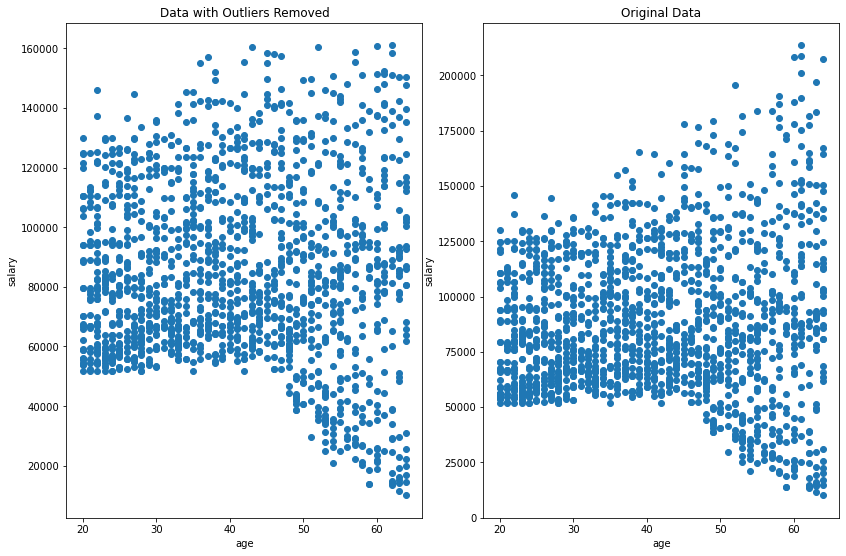

In [13]:
# 11. Remove all outliers for all the category position shown in step 10 (women data only). For 
# each category set the outlier remove range to 2.2. After you have removed all the outliers plot the
# all position category data with outliers and without outliers.
def remove_outliers(df, columns, n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
    return df

df3 = df_women.copy(deep=True)
columns = ['salary', 'age']

# data without outliers 
df3 = remove_outliers(df3, columns, 2.2) 
fig, ax = plt.subplots(1, 2, figsize=(12,8))
fig.tight_layout(pad = 3)
ax[0].set_xlabel('age')
ax[0].set_ylabel('salary')
ax[0].set_title('Data with Outliers Removed')
ax[0].scatter(df3['age'], df3['salary'])

# data with outliers 
ax[1].set_xlabel('age')
ax[1].set_ylabel('salary')
ax[1].set_title('Original Data')
ax[1].scatter(df_women['age'], df_women['salary'])

plt.show()

In [14]:
# 12. Automation, for each category shown in step 10 (women data only) automate the model estimation
# with incremental train test size. Please note that the step size is 0.2 this is different than what
# was shown in the dataframe. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def training_automation(data_source):
    report_df = pd.DataFrame(columns=['Train', 
                                      'Test', 
                                      'Test_R_Score', 
                                      'Test_RMSE',
                                      'Train_R_Score', 
                                      'Train_RMSE',
                                      'Model_Var',
                                      'Model_Error',
                                      'Avg_Salary'])
    df
    model = LinearRegression()

    # getting the dependent and independent variables
    x_data = data_source[['age']]
    y_data = data_source['salary']
    
    sizes = np.arange(0.2, 1.0, 0.2)

    for size in sizes:
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = size)

        # fit the model -> build the training model
        model.fit(x_train, y_train)

        predictions_test = model.predict(x_test) 

        # getting the error of the model
        error_test = y_test - predictions_test

        r2_test = r2_score(y_test, predictions_test)
        rmse_test = mean_squared_error(y_test, predictions_test, squared=True)

        # getting the trainset info
        predictions_train = model.predict(x_train)
        r2_train = r2_score(y_train, predictions_train)
        rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

        # getting the error of the model
        error_train = y_train - predictions_train

        #normalizing by size
        model_variance = (rmse_test /  y_test.size) / (rmse_train /  y_train.size)
        
        error_mean = error_test.mean()
        avg_salary = round(model.intercept_, 2)
        
        # appending new to report dataframe
        report_df.loc[len(report_df.index)] = {'Train': size, 
                                              'Test': 1-size, 
                                              'Test_R_Score': r2_test, 
                                              'Test_RMSE': rmse_test,
                                              'Train_R_Score': r2_train, 
                                              'Train_RMSE': rmse_train,
                                              'Model_Var': model_variance,
                                              'Model_Error': error_mean,
                                              'Avg_Salary':avg_salary}
    return report_df

In [16]:
# Women Positions: All
print("Women Positions: All")
report_df_AllPositions = training_automation(df3) # df3: remove outliers data frame 
report_df_AllPositions

Women Positions: All


,Train,Test,Test_R_Score,Test_RMSE,Train_R_Score,Train_RMSE,Model_Var,Model_Error,Avg_Salary
0,0.2,0.8,-0.030670,9.209761e+08,0.009977,8.918083e+08,0.258177,4649.961690,90665.80
1,0.4,0.6,-0.004227,8.854755e+08,0.005283,9.190727e+08,0.642296,539.692162,91428.98
2,0.6,0.4,-0.024032,9.668039e+08,0.011276,8.587137e+08,1.688812,136.823939,94841.21
3,0.8,0.2,-0.010167,9.436746e+08,0.001363,8.866209e+08,4.257399,-3199.167363,89011.18


In [17]:
# Women Positions: Developer
print("Women Positions: Developer")
dfDeveloper = df3[df3['position_Developer'] == 1]
report_of_Developers = training_automation(dfDeveloper)
report_of_Developers

Women Positions: Developer


,Train,Test,Test_R_Score,Test_RMSE,Train_R_Score,Train_RMSE,Model_Var,Model_Error,Avg_Salary
0,0.2,0.8,-0.062412,9.447615e+08,0.097278,8.471616e+08,0.278802,-3092.243443,131016.04
1,0.4,0.6,-0.008740,9.671188e+08,0.002277,7.958623e+08,0.810122,4831.835151,97998.99
2,0.6,0.4,-0.005392,8.317474e+08,0.025023,9.187625e+08,1.357937,3341.666751,109820.44
3,0.8,0.2,0.039899,9.330020e+08,0.007712,8.727950e+08,4.275927,-2755.038071,105360.14


In [24]:
# Women Positions: Engineer
print("Women Positions: Engineer")
dfEngineer = df3[df3['position_Engineer'] == 1]
report_of_Engineers = training_automation(dfEngineer)
report_of_Engineers

Women Positions: Engineer


,Train,Test,Test_R_Score,Test_RMSE,Train_R_Score,Train_RMSE,Model_Var,Model_Error,Avg_Salary
0,0.2,0.8,-0.008890,8.564735e+08,0.000732,8.581301e+08,0.249517,3268.182661,80468.13
1,0.4,0.6,0.003801,9.162704e+08,0.004539,7.478938e+08,0.816756,-579.421439,79922.42
2,0.6,0.4,-0.034648,9.544522e+08,0.006189,7.873332e+08,1.818389,5740.089030,76206.32
3,0.8,0.2,-0.053505,9.428777e+08,0.015183,8.289724e+08,4.549622,-640.647115,74150.96


In [18]:
# Women Positions: Accountant	
print("Women Positions: Accountant")
dfAccountant = df3[df3['position_Accountant'] == 1]
report_of_Accountants = training_automation(dfAccountant)
report_of_Accountants

Women Positions: Accountant


,Train,Test,Test_R_Score,Test_RMSE,Train_R_Score,Train_RMSE,Model_Var,Model_Error,Avg_Salary
0,0.2,0.8,-0.006199,9.402885e+08,0.006534,7.534155e+08,0.307957,2192.319718,98970.10
1,0.4,0.6,-0.002867,9.270055e+08,0.000846,8.604660e+08,0.716144,-2110.668347,96497.31
2,0.6,0.4,-0.006031,9.955644e+08,0.000480,8.395345e+08,1.758333,-445.792758,90666.67
3,0.8,0.2,0.002827,1.359697e+09,0.000223,7.832698e+08,6.883838,5.825356,93934.08


In [19]:
# Women Positions: Financial Analyst
print("Women Positions: Financial Analyst")
dfFinanAnlyst = df3[df3['position_FinancialAnalyst'] == 1]
report_of_Financial_Analyst = training_automation(dfFinanAnlyst)
report_of_Financial_Analyst

Women Positions: Financial Analyst


,Train,Test,Test_R_Score,Test_RMSE,Train_R_Score,Train_RMSE,Model_Var,Model_Error,Avg_Salary
0,0.2,0.8,-0.000430,8.529513e+08,4.545469e-05,1.051416e+09,0.201909,160.973112,84478.32
1,0.4,0.6,-0.030490,9.600154e+08,2.183932e-04,8.159436e+08,0.779739,5210.911436,80872.12
2,0.6,0.4,-0.079536,7.814784e+08,1.344129e-02,9.871655e+08,1.176950,3753.433433,95548.06
3,0.8,0.2,-0.001196,9.921144e+08,4.925346e-08,8.668725e+08,4.497588,-1076.259071,85575.07


In [20]:
# Women Positions: Secretary
print("Women Positions: Secretary")
dfSecretary = df3[df3['position_Secretary'] == 1]
report_of_Secretary = training_automation(dfSecretary)
report_of_Secretary

Women Positions: Secretary


,Train,Test,Test_R_Score,Test_RMSE,Train_R_Score,Train_RMSE,Model_Var,Model_Error,Avg_Salary
0,0.2,0.8,-0.003790,2.696111e+08,0.001070,3.098278e+08,0.216616,-775.949709,62155.22
1,0.4,0.6,-0.019590,2.385605e+08,0.000007,3.390925e+08,0.466337,2144.996399,61858.40
2,0.6,0.4,-0.023784,3.569474e+08,0.008451,2.266103e+08,2.342545,-1024.850366,59286.13
3,0.8,0.2,-0.005848,2.272512e+08,0.000440,2.897505e+08,3.084025,-550.445919,62305.21


In [ ]:
# Make a comment on the results of these data frame outputs. 

# Why do you think we’re getting these type of Test_R_Scores? 
# Based upon on the calculation results, all positions' Test_R_Score are pretty low or negative, which means this model is failed and 
# over fit. If it is combined with a higher model error value, it will cause that the model's predictions are far from what we observed 
# in the real life.

# Why are the R_Train scores so low?
# Because we used age as an attribute to predict the salary. From the plots we got in step 11, we could see that some women over 40 
# tend to earn more, while the other women over 40 earn less, which made a negative impact on the R_Train scores. 

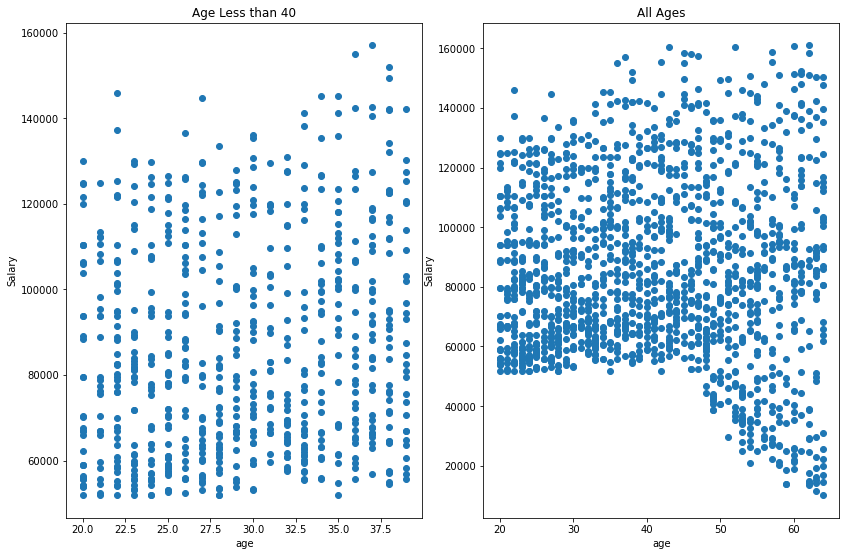

In [22]:
# 13. Filter the all position category data (women only) just that it only contains women that are of 
# age less than 40 then plot the original data with the filtered data next to it, see below.
import pandas as pd
import matplotlib.pyplot as plt

# filter out all women that are of age less than 40
df4 = df3.loc[(df3.age < 40)]
fig, ax = plt.subplots(1, 2, figsize=(12,8))
fig.tight_layout(pad = 3)
# ages less than 40
ax[0].set_xlabel('age')
ax[0].set_ylabel('Salary')
ax[0].set_title('Age Less than 40')
ax[0].scatter(df4['age'], df4['salary'])
# all ages
ax[1].set_xlabel('age')
ax[1].set_ylabel('Salary')
ax[1].set_title('All Ages')
ax[1].scatter(df3['age'], df3['salary'])

plt.show()

In [ ]:
# Give a one to two sentence comment regarding the images. How do you think this would 
# affect the estimation of the linear regression model?

# This will not have that much impact on the estimation of the linear regression model, 
# because the age that we filtered out is less than 40, from the plot we got, the women 
# over 40 have two different salaries (either higher or lower), if we only filter out the 
# age under 40 which is not good enough to predict salary. Thus, it is not suitable to use 
# age as a variable on the the estimation of the linear regression model.

In [23]:
# 14. Use the filtered data that you created in step 13 (women only, position -> all, age < 40), and 
# re-do an automation estimate similar to step 12. Print out the data frame showing automated dataframe.
report_df4 = training_automation(df4)
report_df4

,Train,Test,Test_R_Score,Test_RMSE,Train_R_Score,Train_RMSE,Model_Var,Model_Error,Avg_Salary
0,0.2,0.8,0.020766,6.169273e+08,0.015975,5.591192e+08,0.273891,1286.107047,69566.04
1,0.4,0.6,0.013219,5.927184e+08,0.029894,6.243498e+08,0.630647,1791.251777,62098.72
2,0.6,0.4,-0.014518,6.074170e+08,0.032309,6.053604e+08,1.501538,-3485.945398,64392.26
3,0.8,0.2,0.003239,7.220772e+08,0.020730,5.751355e+08,5.013058,4340.248420,67075.85


--------------------------------------
Model Info
--------------------------------------
salary = 64704.43976595239 + 718.8124484624504 age  + error 

Test r_score is:	 0.015327305990206042
Test rmse is:		 646732695.5377862

Training-Test Split:	 0.6 training 0.4 test

Training r_score is:	 0.028398008341785963
Training rmse is:	 575235317.72715
Model Variance:		 1.682451746491625

Mean of Test Error:	 -49.358246142950186
Mean of Train Error:	 -3.569012384208458e-12

Avg Salary:  64704.44


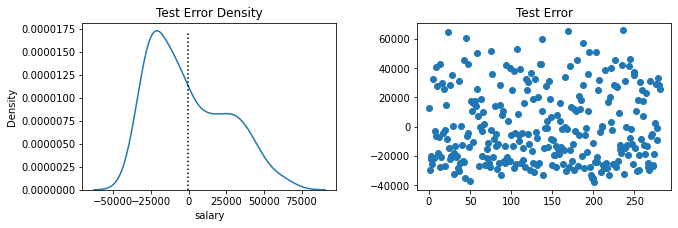

In [32]:
# 15. From step 14’s results pick the best suited train test size and re-estimate the model that gives 
# the following output:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

model = LinearRegression()

# getting the dependent and independent variables
x_data = df4[['age']]
y_data = df4['salary']

# split data: training 60% , test 40% with shuffle
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle = True, train_size = 0.6)

# fit the model -> build the training model
model.fit(x_train, y_train)

#-----------------------------------------------------
from sklearn.metrics import mean_squared_error, r2_score

predictions_test = model.predict(x_test)

# getting the error of the model
error_test = y_test - predictions_test
r2_test = r2_score(y_test, predictions_test)
rmse_test = mean_squared_error(y_test, predictions_test, squared=True)

# getting the trainset info
predictions_train = model.predict(x_train)
r2_train = r2_score(y_train, predictions_train)
rmse_train = mean_squared_error(y_train, predictions_train, squared=True)

# getting the error of the model
error_train = y_train - predictions_train

#normalizing by size
model_variance = (rmse_test / y_test.size) / (rmse_train /  y_train.size)

#--------------------------------------------------
# Model Info
#--------------------------------------------------
print("--------------------------------------")
print("Model Info")
print("--------------------------------------")
print(f"salary = {model.intercept_} + {model.coef_[0]} age  + error ", end="\n\n")
print('Test r_score is:\t', r2_test)
print('Test rmse is:\t\t', rmse_test)
print()
print(f"Training-Test Split:\t 0.6 training 0.4 test")
print()
print('Training r_score is:\t', r2_train)
print('Training rmse is:\t', rmse_train)
print('Model Variance:\t\t', model_variance)
print()
print('Mean of Test Error:\t', error_test.mean())
print('Mean of Train Error:\t', error_train.mean())
print()
print('Avg Salary: ', round(model.intercept_, 2))

#-------------------------------------------------------------
# creating density plot of error terms
# we use Density plots to observe how a certain 
# variable’s values are distributed in the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.tight_layout(pad = 5)

#density plot of error of the test model
plt.subplot(1,2,1)
plt.title('Test Error Density')

# remove scientific notation from axis
plt.ticklabel_format(style='plain')
my_kde = sns.kdeplot(error_test)
x,y = my_kde.lines[0].get_data()

# vlines(x, ymin, ymax, colors, linestyles)
plt.vlines(error_test.mean(), 0, y.max()  , color='Black', ls=':')
plt.subplot(1,2,2)
plt.title('Test Error')
plt.scatter(range( error_test.size), error_test)
plt.show()

In [ ]:
# Give a comment on why you picked this combination of train test size.
# The reason why I picked 60% and 40% to split training and testing data is that the previous result is shown in step 14 
# has the highest Test and Train R scores as well as the lowest model error value.